In [37]:
import collections

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics

%matplotlib inline

In [8]:
df = pd.read_table('p_vs_rank.tsv.gz')

In [10]:
df.head()

,entrez_gene_ida,entrez_gene_idb,lit_2010,lit_2013,ht_2014,lit_2010_rwr,lit_2010_p_value,lit_2013_rwr,lit_2013_p_value
0,60,60,1.0,0.0,1.0,1.0,0.000,0.0,0.0
1,60,71,0.0,0.0,1.0,0.0,0.395,0.0,0.0
2,60,89,0.0,0.0,0.0,0.0,0.000,0.0,0.0
3,60,185,0.0,0.0,0.0,0.0,0.000,0.0,0.0
4,60,259,0.0,0.0,0.0,0.0,0.588,0.0,0.0


In [45]:
df.sum()

entrez_gene_ida        6.170744e+10
entrez_gene_idb        6.170683e+10
lit_2010               1.210000e+02
lit_2013               2.500000e+02
ht_2014                7.520000e+02
lit_2010_rwr           1.271693e+02
lit_2010_p_value       7.661846e+03
lit_2013_rwr           2.421020e+02
lit_2013_p_value       3.556987e+04
lit_2010_degree_sum    2.579860e+05
lit_2013_degree_sum    5.330290e+05
dtype: float64

### AUC

Against my expectations, the AUC goes down using p-values

In [13]:
sklearn.metrics.roc_auc_score(df['ht_2014'], df['lit_2010_rwr'])

0.5492824970430712

In [14]:
sklearn.metrics.roc_auc_score(df['ht_2014'], df['lit_2010_p_value'])

0.5095103199460361

In [15]:
sklearn.metrics.roc_auc_score(df['ht_2014'], df['lit_2013_rwr'])

0.586813408127805

In [16]:
sklearn.metrics.roc_auc_score(df['ht_2014'], df['lit_2013_p_value'])

0.4721691002240965

### Correlation of prediction values with degree

Against my expectations, p-values correlate **more strongly** with degree than raw RWR.

In [34]:
for network in ['lit_2010', 'lit_2013']:
    relevant_df = df.query(f'{network} == 1')
    id_to_degree = (collections.Counter(relevant_df.groupby('entrez_gene_ida')[network].sum().to_dict())
                    + collections.Counter(relevant_df.groupby('entrez_gene_idb')[network].sum().to_dict()))
    df[f'{network}_degree_sum'] = (
        df['entrez_gene_ida'].map(id_to_degree) + df['entrez_gene_idb'].map(id_to_degree)
    )

In [36]:
df.head()

,entrez_gene_ida,entrez_gene_idb,lit_2010,lit_2013,ht_2014,lit_2010_rwr,lit_2010_p_value,lit_2013_rwr,lit_2013_p_value,lit_2010_degree_sum,lit_2013_degree_sum
0,60,60,1.0,0.0,1.0,1.0,0.000,0.0,0.0,4.0,0.0
1,60,71,0.0,0.0,1.0,0.0,0.395,0.0,0.0,3.0,1.0
2,60,89,0.0,0.0,0.0,0.0,0.000,0.0,0.0,2.0,0.0
3,60,185,0.0,0.0,0.0,0.0,0.000,0.0,0.0,2.0,0.0
4,60,259,0.0,0.0,0.0,0.0,0.588,0.0,0.0,4.0,2.0


In [38]:
scipy.stats.pearsonr(df['lit_2010_rwr'], df['lit_2010_degree_sum'])

(0.06608044657545126, 2.452830952583475e-272)

In [39]:
scipy.stats.pearsonr(df['lit_2013_rwr'], df['lit_2013_degree_sum'])

(0.05829985520922456, 2.381843129874488e-212)

In [40]:
scipy.stats.pearsonr(df['lit_2010_p_value'], df['lit_2010_degree_sum'])

(0.5662277779970499, 0.0)

In [41]:
scipy.stats.pearsonr(df['lit_2013_p_value'], df['lit_2013_degree_sum'])

(0.5916348546323037, 0.0)

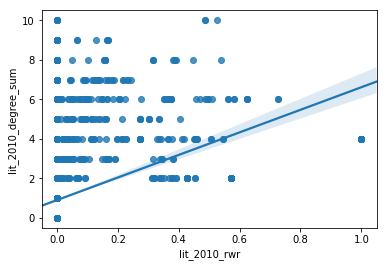

In [44]:
sns.regplot(df['lit_2010_rwr'], df['lit_2010_degree_sum'])

/home/michael/installs/miniconda3/envs/xswap-analysis/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


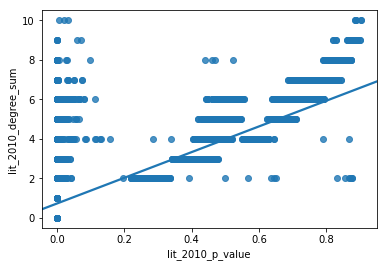

In [42]:
sns.regplot(df['lit_2010_p_value'], df['lit_2010_degree_sum'])